# Inspect single time steps of the vKdV output with realistic (AR model) boundary conditions

In [1]:
import h5py
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize'] = 'medium'

In [3]:
# Load the filed data
###########
#basedir = 'C:\Projects\ARCHub\DATA\FIELD\ShellCrux\'
# basedir = '/home/mrayson/group/mrayson/DATA/FIELD/ShellCrux/'
basedir = '/data-obs/jupyter-ubuntu/Crux/'
# ncfile = '/home/suntans/Projects/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy_wout_motion.nc'
ncfile = '{}/KP150_Fitted_Buoyancy_wout_motion_unvenfilt.nc'.format(basedir)

mode = 0
###########

ds1 = xr.open_dataset(ncfile,group='KP150_phs1')
ds2 = xr.open_dataset(ncfile,group='KP150_phs2')

# Merge the two

A_n = xr.concat([ds1['A_n'][:,mode],ds2['A_n'][:,mode]], dim='time')
#a0 = xr.concat([ds1['amp'][:,mode,0],ds2['amp'][:,mode,0]], dim='timeslow')

# Quality control
A_n.loc['2016-09-18':'2016-10-31']=np.nan

In [4]:
def load_vkdv_h5(vkdvfile):
    # Get the time from the beta file
    with h5py.File(vkdvfile,'r') as f:
        time=np.array(f['time']).astype('<M8[ns]')
        a0 = f['a0'][:]
        A = f['A'][:]
        Amax = f['max_amplitude'][:]
        #z_std = np.array(f['data/z_std'])
        #rho_std = np.array(f['data/rho_std'])
        #rho_mu = np.array(f['data/rho_mu'])
    
    return time, a0, A, Amax
    #nparams, nt, nsamples = beta_samples.shape
    #return xr.DataArray(beta_samples, dims=('params','time','draw'), 
    #             coords={'time':t_beta,'params':range(nparams), 'draw':range(nsamples)})

In [5]:
def plot_A(testfile):
    time, a0, A, Amax = load_vkdv_h5(testfile)

    nsample = A.shape[0]


    # Calculate the median and credible intervals
    A_50 = np.median(A, axis=0)
    A_5 = np.percentile(A, 5, axis=0)
    A_95 = np.percentile(A, 95, axis=0)
    A_1 = np.percentile(A, 1, axis=0)
    A_99 = np.percentile(A, 99, axis=0)

    Aobs = A_n.sel(time=slice(time[0],time[-1]))


    #plt.figure()
    for ii in range(0,nsample,1):
         plt.plot(time,A[ii,:],'navy',lw=0.2, alpha=0.5)
         #plt.plot(time,a0[ii,:],'navy',lw=0.2)
    plt.plot(time, A_50, '--', c='c')
#     plt.fill_between(time, A_1, A_99,  color='0.7', alpha=0.4)
    plt.fill_between(time, A_5, A_95, color='0.4', alpha=0.5) # 0.9 credible intervals

    Aobs.plot(c='r', lw=0.5)    
    plt.ylim(-70,70)
    plt.xlim(time[0],time[-1])
    plt.title('')
    plt.ylabel('A [m]')
# plt.xticks(rotation=17)

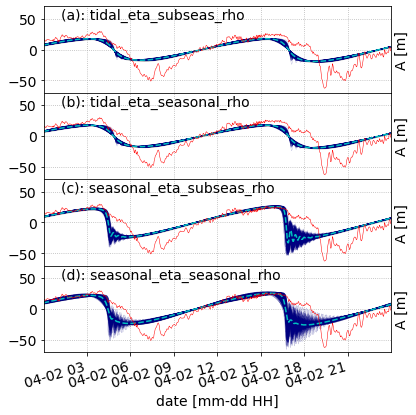

In [6]:
# testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-04-08_timepoint-333_output.h5'
scenario0 = 'slim-harmo_a0_data_rho_v4'
scenario1 = 'slim-harmo_a0_clim_rho_v4'
scenario2 = 'slim-seasonal_a0_data_rho_v4'
scenario3 = 'slim-seasonal_a0_clim_rho_v4'
# scenario3 = 'slim-stoch_a0_clim_rho_v3'


# tstep = 333 # March-30
# tstep = 334 # March-31

tstep = 336 # April-2
# tstep = 338 # April-4

# tstep = 322 # March-19
# tstep = 289 # Feb-14
# tstep = 66 # July-6
# tstep = 71 # July-7
# tstep = 99 # Aug

# tstep = 69 # July-7
# tstep = 219 # Dec-6
# tstep = 199 # Nov-

datadir = '../../../KDV/output/'

file0 = glob('{}/{}/*_timepoint-{}_output.h5'.format(datadir, scenario1, tstep))[0]
file1 = glob('{}/{}/*_timepoint-{}_output.h5'.format(datadir, scenario1, tstep))[0]
file2 = glob('{}/{}/*_timepoint-{}_output.h5'.format(datadir, scenario2, tstep))[0]
file3 = glob('{}/{}/*_timepoint-{}_output.h5'.format(datadir, scenario3, tstep))[0]

file1,file2

plt.figure(figsize=(6,6))
ax00=plt.subplot(411)
plot_A(file0)
ax00.yaxis.set_label_position("right")
ax00.set_xticklabels([])
plt.xlabel('')
plt.text(0.05, 0.85, '(a): tidal_eta_subseas_rho', transform=ax00.transAxes)
plt.grid(b=True, ls=':')

ax0=plt.subplot(412)
plot_A(file1)
ax0.yaxis.set_label_position("right")
ax0.set_xticklabels([])
plt.xlabel('')
plt.text(0.05, 0.85, '(b): tidal_eta_seasonal_rho', transform=ax0.transAxes)
plt.grid(b=True, ls=':')

ax1=plt.subplot(413)
plot_A(file2)
ax1.yaxis.set_label_position("right")
ax1.set_xticklabels([])
plt.xlabel('')
plt.text(0.05, 0.85, '(c): seasonal_eta_subseas_rho', transform=ax1.transAxes)
plt.grid(b=True, ls=':')

ax2=plt.subplot(414)
plot_A(file3)
plt.text(0.05, 0.85, '(d): seasonal_eta_seasonal_rho', transform=ax2.transAxes)
plt.grid(b=True, ls=':')
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=16)
plt.xlabel('date [mm-dd HH]')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('../FIGURES/vkdv_A_comparison_tstep_{}_v4.png'.format(tstep), dpi=150)

In [7]:
plt.figure()
plt.hist(Amax, bins=np.arange(-80,85,5), normed=True)

N = Amax.shape[0]
P40 = np.sum(Amax<-40)/N*100
P40

NameError: name 'Amax' is not defined

<Figure size 432x288 with 0 Axes>

16.400000000000002